In [11]:
import os
import sys
import pinocchio as pin
import cv2
import numpy as np
from os.path import dirname, join, abspath
import torch

# model_dir=dirname(__file__)
model_dir="/home/faye/Desktop/thesis/pinocchio"
model_absPath=join(model_dir,"model/darias_singleArm.urdf")

model=pin.buildModelFromUrdf(model_absPath)
print('model name: ' + model.name)



model name: darias


In [76]:
data     = model.createData()
q_random=pin.randomConfiguration(model)
print(q_random)

[-1.11590809  0.61109857 -2.93142597  0.13806184  2.04080034  0.49614867
  0.59770903]


In [42]:
jointIdx_pinocchio=[1,2,3,4,5,6,7]
frameIdx_pinocchio=[7,9,11,13,15,17,19]
jointIdx_pybullet=[26,27,28,29,30,31,32]

jointDict_pin2bullet=dict((pin,bullet) for pin,bullet in zip(jointIdx_pinocchio,jointIdx_pybullet))
jointDict_bullet2pin=dict((bullet,pin) for bullet,pin in zip(jointIdx_pybullet,jointIdx_pinocchio))


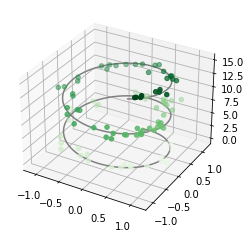

In [1]:

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

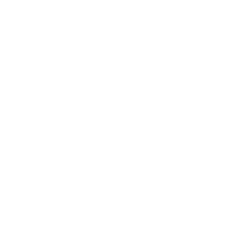

In [8]:
from mpl_toolkits.mplot3d import axes3d
from pylab import *
import matplotlib.pyplot as p1t
import matplotlib
import numpy as np
import time
def generate(X, Y, phi):
    R = 1- np. sqrt (X**2 + Y**2)
    return np.cos(3*np.pi*X+phi)*R

c_1ist=[]

for cmap in colormaps():
    c_1ist.append(cmap)
fig = p1t. figure()
ax = fig.add_subplot(111, projection='3d' )
p1t. axis( 'off')
# Make the X, Y meshgrid.
xs = np.linspace(-1,1,50)
ys = np.linspace(-1,1,50)
X,Y = np. meshgrid(xs, ys)
# view data shape
# print (X)
# print (Y)
ax.set_zlim(-1, 1)
#开始绘图
wframe = None
# processed time for count
tstart=time. time ()
# initial value, for cmap

# initial value for cmap
cmap ='viridis'
i=0
# notice to clear surface for new surf ace
for phi in np.linspace (0,180./np. pi, 100):
    Z = generate(X, Y, phi)



In [ ]:
np.gradient(X,Y,Z,)

In [7]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 



x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")

ModuleNotFoundError: No module named 'seaborn'